In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from cobaya.model import get_model
import healpy as hp
from astropy.io import fits

from IPython.display import display, Math
import matplotlib.pyplot as plt
#from matplotlib_inline.backend_inline import set_matplotlib_formats
from astropy.visualization import quantity_support
import corner
from getdist import plots, MCSamples, loadMCSamples

quantity_support()
#set_matplotlib_formats('svg')
from matplotlib import cm
from cycler import cycler
from matplotlib import colors
colorblind = ["#4477AA", "#66CCEE", "#228833", "#CCBB44", "#EE6677", "#AA3377", "#BBBBBB"]
plt.rc('legend', frameon = False)
plt.rc('figure', figsize = (7, 7/1.25))
plt.rc('font', size = 14)

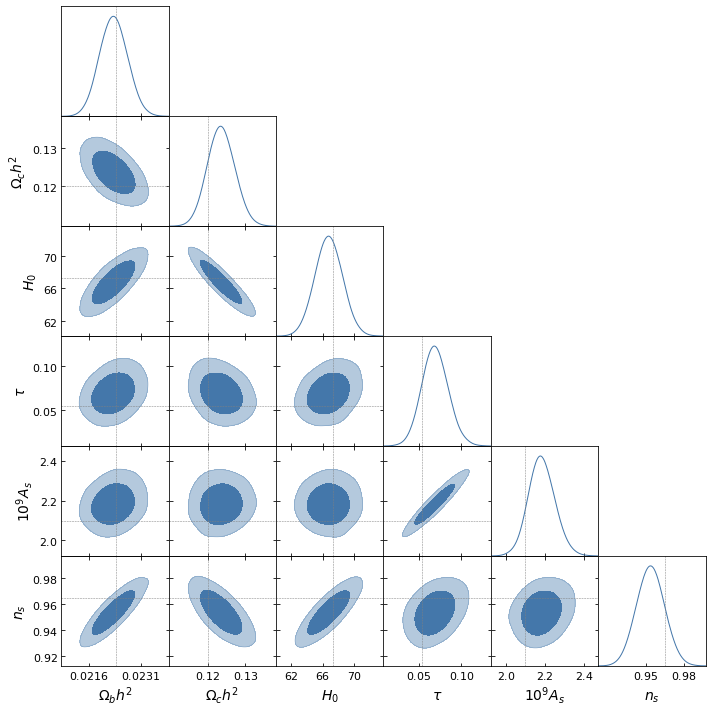

In [2]:
cols = np.array(["ombh2", "omch2", "H0", "tau", "A", "ns"])
labels = np.array([r"\Omega_b h^2", r"\Omega_c h^2", r"H_0", r"\tau", r"10^9 A_s", r"n_s"])
correct_values = np.array([0.02237, 0.12, 67.36, 0.0544, 2.1, 0.9649])
chain_F = pd.read_csv("chains/all_pol_100000.1.txt", header = 0, delim_whitespace = True)
samples_F = chain_F[cols]
cobaya_chain = np.array(samples_F.iloc[10:])

samples_cobaya = MCSamples(samples=cobaya_chain, names = cols, labels = labels, label = "Cobaya")
g = plots.get_subplot_plotter(width_inch=10)
g.settings.figure_legend_frame = False
g.settings.scaling = False
g.triangle_plot(samples_cobaya, filled = True, contour_colors = colorblind, 
                line_args = [{'color': colorblind[0]}],
                markers = {
                    cols[0]: correct_values[0],
                    cols[1]: correct_values[1],
                    cols[2]: correct_values[2], 
                    cols[3]: correct_values[3], 
                    cols[4]: correct_values[4],
                    cols[5]: correct_values[5]})
#plt.savefig('../../thesis_figures/corner_isotropic.pdf')

In [3]:
print(np.mean(cobaya_chain[:, 4]) - np.std(cobaya_chain[:, 4]))
print(correct_values[4])

2.1148842460957464
2.1


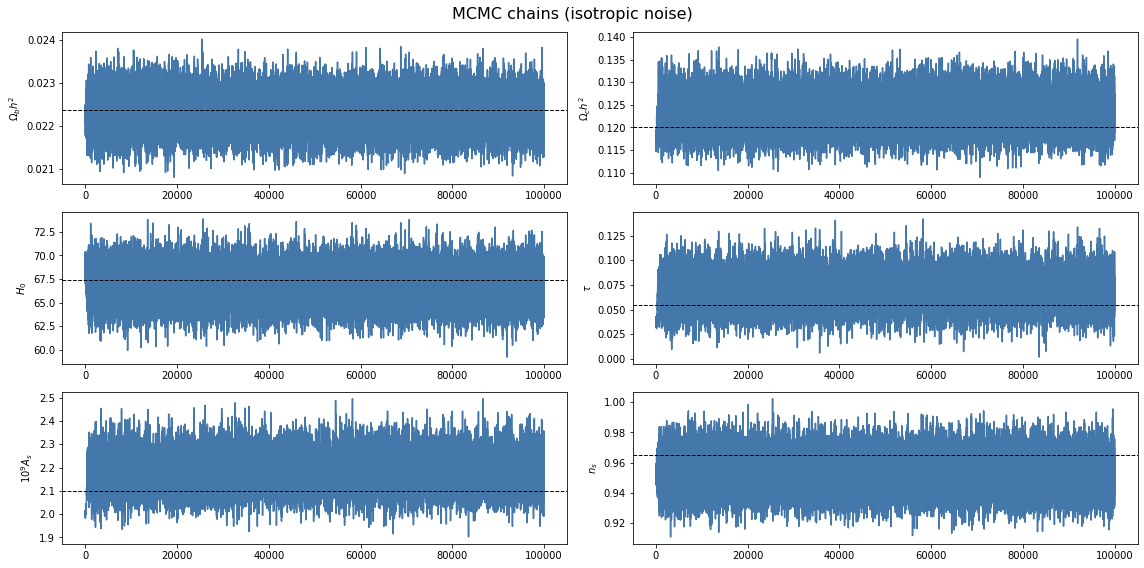

In [4]:
labels_tex = np.array([r"$\Omega_b h^2$", r"$\Omega_c h^2$", r"$H_0$", r"$\tau$", r"$10^9 A_s$", r"$n_s$"])
fig = plt.figure(layout = "tight", figsize = (16, 16/2))
ax = fig.subplots(3, 2).flatten()
for i in range(cobaya_chain.shape[1]):
    ax[i].plot(cobaya_chain[:, i], color = "#4477AA")
    ax[i].axhline(correct_values[i], ls = '--', lw = 1, color = 'k')
    ax[i].set_ylabel(labels_tex[i])
fig.suptitle("MCMC chains (isotropic noise)", fontsize = 16)
fig.savefig("../../thesis_figures/chains_isotropic.pdf")
plt.show()

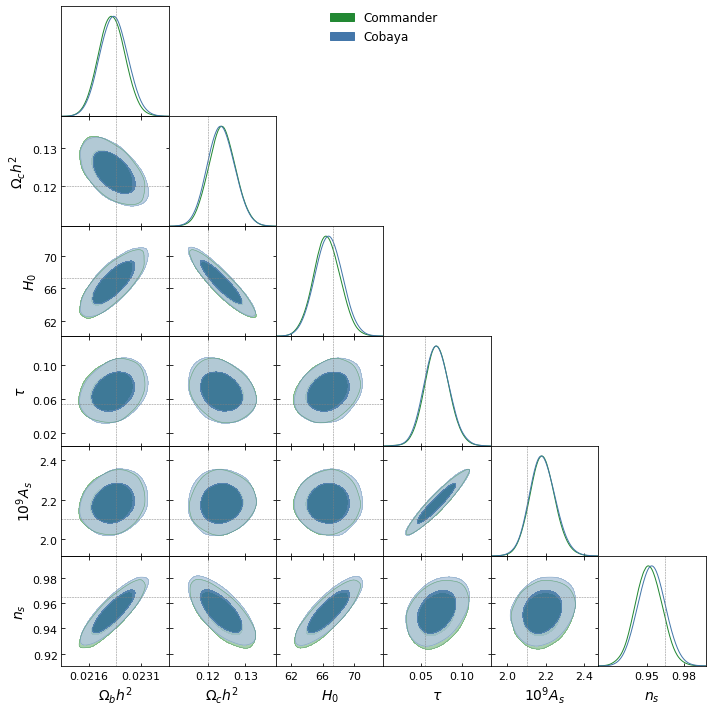

In [5]:
commander_chain = np.loadtxt("/mn/stornext/d16/cmbco/bp/johanres/commander_camb/Commander/chains_camb_isotropic_noise_nside512_nomask/cosmo_param_out.dat")

samples_commander = MCSamples(samples = commander_chain, names = cols, labels = labels, label = "Commander")
g_comb = plots.get_subplot_plotter(width_inch = 10)
g_comb.settings.figure_legend_frame = False
g_comb.settings.scaling = False
g_comb.triangle_plot([samples_commander, samples_cobaya], label_order = [0, 1], filled = True, contour_colors = [colorblind[2], colorblind[0]], 
                line_args = [{'color': colorblind[2]}, 
                             {'color': colorblind[0]}],
                      markers = {
                          cols[0]: correct_values[0],
                          cols[1]: correct_values[1],
                          cols[2]: correct_values[2], 
                          cols[3]: correct_values[3], 
                          cols[4]: correct_values[4],
                          cols[5]: correct_values[5]})
plt.savefig('../../thesis_figures/corner_isotropic_comm.pdf')

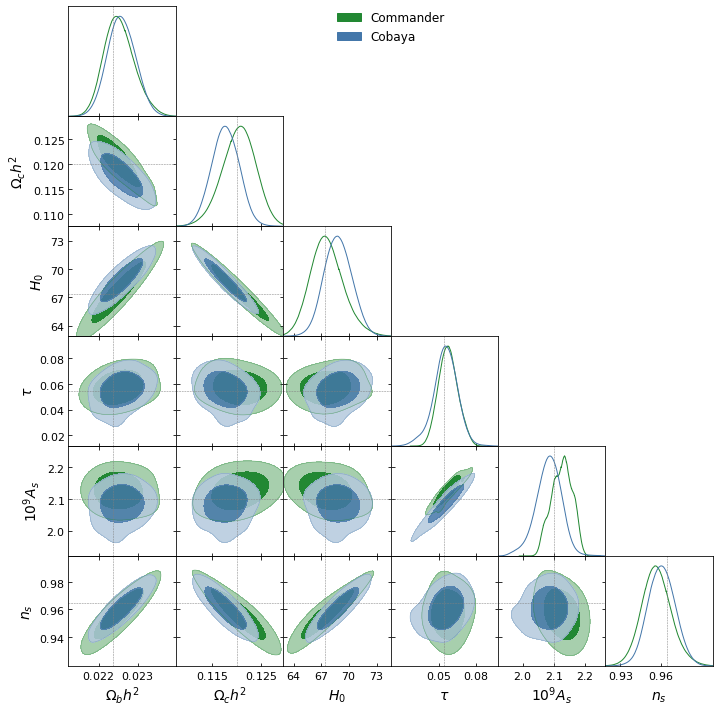

In [6]:
chain_mask = pd.read_csv("chains/mask.1.txt", header = 0, delim_whitespace = True)
samples_mask = chain_mask[cols]
cobaya_chain_mask = np.array(samples_mask.iloc[10:])
#print(cobaya_chain_mask.shape)
samples_cobaya_mask = MCSamples(samples=cobaya_chain_mask, names = cols, labels = labels, label = "Cobaya")

commander_chain_mask = np.loadtxt("/mn/stornext/d16/cmbco/bp/johanres/commander_camb/Commander/chains_camb_anisotropic_noise_nside512_realisticmask/cosmo_param_out.dat")
samples_commander_mask = MCSamples(samples = commander_chain_mask, names = cols, labels = labels, label = "Commander")

g_mask = plots.get_subplot_plotter(width_inch=10)
g_mask.settings.figure_legend_frame = False
g_mask.settings.scaling = False
g_mask.triangle_plot([samples_commander_mask, samples_cobaya_mask], label_order = [0, 1], filled = True, contour_colors = [colorblind[2], colorblind[0]], 
                line_args = [{'color': colorblind[2]}, 
                             {'color': colorblind[0]}],
                      markers = {
                          cols[0]: correct_values[0],
                          cols[1]: correct_values[1],
                          cols[2]: correct_values[2], 
                          cols[3]: correct_values[3], 
                          cols[4]: correct_values[4],
                          cols[5]: correct_values[5]})
plt.savefig('../../thesis_figures/corner_anisotropic_realisticmask_comm_try1.pdf')

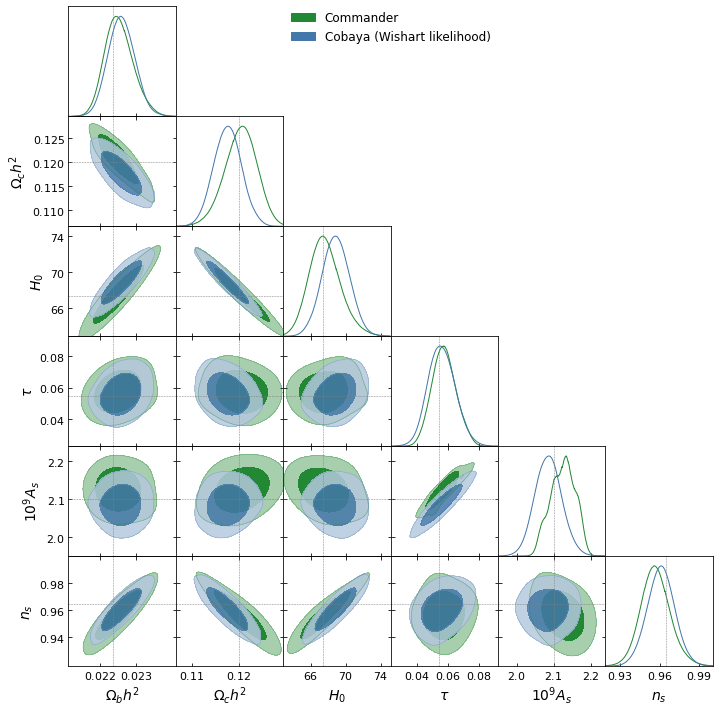

In [7]:
chain_mask_more = pd.read_csv("chains/mask_more_samples.1.txt", header = 0, delim_whitespace = True)
samples_mask_more = chain_mask_more[cols]
cobaya_chain_mask_more = np.array(samples_mask_more.iloc[10:])
samples_cobaya_mask_more = MCSamples(samples=cobaya_chain_mask_more, names = cols, labels = labels, label = "Cobaya (Wishart likelihood)")

g_mask_more = plots.get_subplot_plotter(width_inch=10)
g_mask_more.settings.figure_legend_frame = False
g_mask_more.settings.scaling = False
g_mask_more.triangle_plot([samples_commander_mask, samples_cobaya_mask_more], label_order = [0, 1], filled = True, contour_colors = [colorblind[2], colorblind[0]], 
                      line_args = [{'color': colorblind[2]}, 
                                   {'color': colorblind[0]}],
                      markers = {
                          cols[0]: correct_values[0],
                          cols[1]: correct_values[1],
                          cols[2]: correct_values[2], 
                          cols[3]: correct_values[3], 
                          cols[4]: correct_values[4],
                          cols[5]: correct_values[5]})
#plt.savefig('../../thesis_figures/corner_anisotropic_realisticmask_comm_more_samples.pdf')

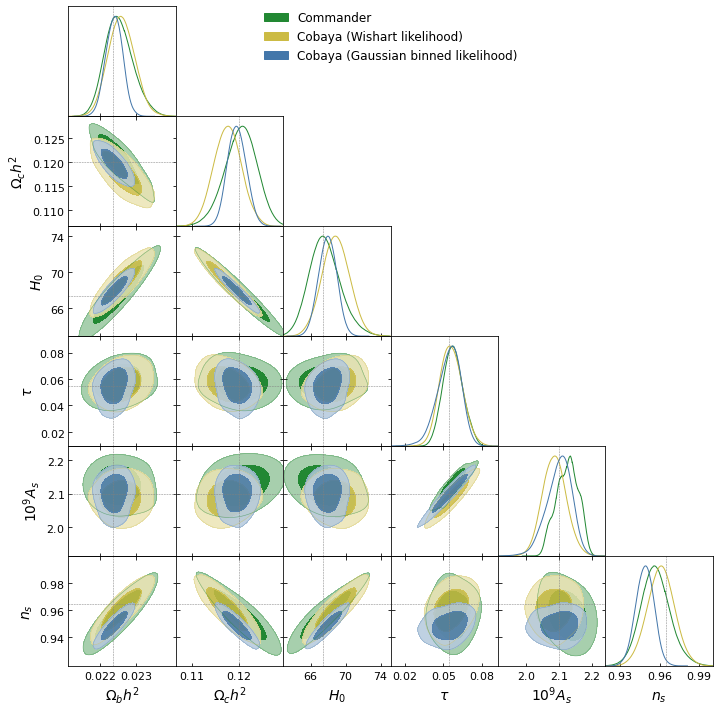

In [8]:
chain_mask_gal = pd.read_csv("chains/mask_gal.1.txt", header = 0, delim_whitespace = True)
samples_mask_gal = chain_mask_gal[cols]
cobaya_chain_mask_gal = np.array(samples_mask_gal.iloc[10:])
samples_cobaya_mask_gal = MCSamples(samples=cobaya_chain_mask_gal, names = cols, labels = labels, label = "Cobaya (Gaussian binned likelihood)")

g_mask_more = plots.get_subplot_plotter(width_inch=10)
g_mask_more.settings.figure_legend_frame = False
g_mask_more.settings.scaling = False
g_mask_more.triangle_plot([samples_commander_mask, samples_cobaya_mask_more, samples_cobaya_mask_gal], label_order = [0, 1, 2],
                          filled = True, contour_colors = [colorblind[2], colorblind[3], colorblind[0]], 
                          line_args = [{'color': colorblind[2]}, 
                                       {'color': colorblind[3]},
                                       {'color': colorblind[0]}],
                          markers = {
                              cols[0]: correct_values[0],
                              cols[1]: correct_values[1],
                              cols[2]: correct_values[2], 
                              cols[3]: correct_values[3], 
                              cols[4]: correct_values[4],
                              cols[5]: correct_values[5]})
#plt.savefig('../../thesis_figures/corner_anisotropic_realisticmask_compare.pdf')

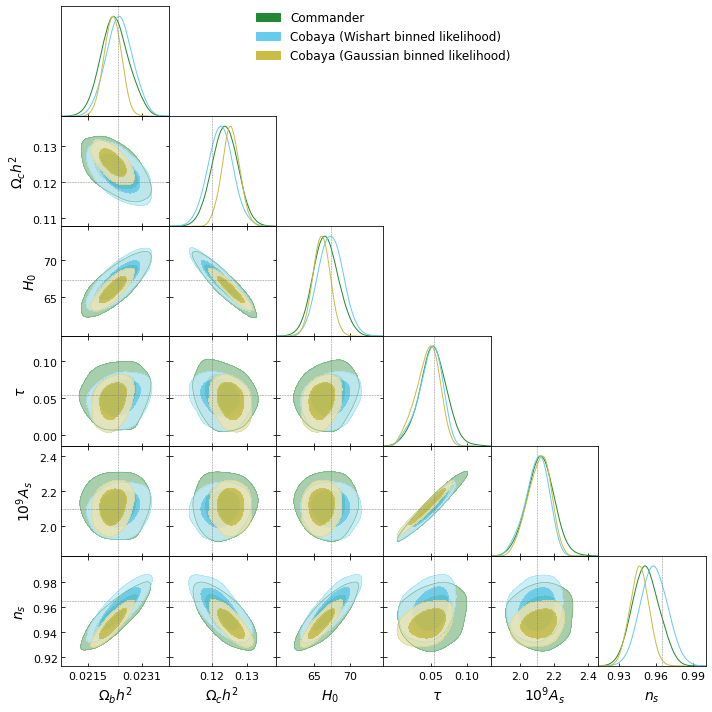

In [9]:
chain_mask_const = pd.read_csv("chains/mask_const.1.txt", header = 0, delim_whitespace = True)
samples_mask_const = chain_mask_const[cols]
cobaya_chain_mask_const = np.array(samples_mask_const.iloc[10:])
samples_cobaya_mask_const = MCSamples(samples=cobaya_chain_mask_const, names = cols, labels = labels, label = "Cobaya (Gaussian binned likelihood)")

chain_const_binW = pd.read_csv("chains/mask_const_binW.1.txt", header = 0, delim_whitespace = True)
samples_const_binW = chain_const_binW[cols]
cobaya_chain_const_binW = np.array(samples_const_binW.iloc[10:])
samples_cobaya_const_binW = MCSamples(samples=cobaya_chain_const_binW, names = cols, labels = labels, label = "Cobaya (Wishart binned likelihood)")

commander_chain_mask10 = np.loadtxt("/mn/stornext/d16/cmbco/bp/johanres/commander_camb/Commander/chains_camb_isotropic_noise_nside512_10mask_no_flucdipole_no_dip_fluc_accept/cosmo_param_out.dat")
samples_commander_mask10 = MCSamples(samples = commander_chain_mask10, names = cols, labels = labels, label = "Commander")

g = plots.get_subplot_plotter(width_inch=10)
g.settings.figure_legend_frame = False
g.settings.scaling = False
g.triangle_plot([samples_commander_mask10, samples_cobaya_const_binW, samples_cobaya_mask_const], label_order = [0, 1, 2], 
                filled = True, contour_colors = [colorblind[2], colorblind[1], colorblind[3]],
                line_args = [{'color': colorblind[2]}, 
                             {'color': colorblind[1]}, 
                             {'color': colorblind[3]}],
                      markers = {
                          cols[0]: correct_values[0],
                          cols[1]: correct_values[1],
                          cols[2]: correct_values[2], 
                          cols[3]: correct_values[3], 
                          cols[4]: correct_values[4],
                          cols[5]: correct_values[5]})
plt.savefig('../../thesis_figures/corner_isotropic_mask10_compare.pdf')

(16560, 6)


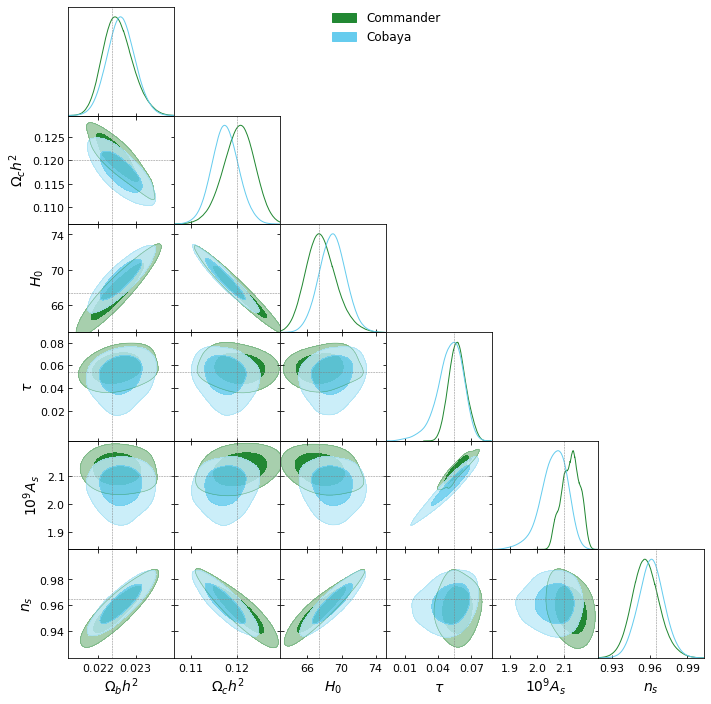

In [13]:
chain_gal_binW = pd.read_csv("chains/mask_gal_binW.1.txt", header = 0, delim_whitespace = True)
samples_gal_binW = chain_gal_binW[cols]
print(samples_gal_binW.shape)
cobaya_chain_gal_binW = np.array(samples_gal_binW.iloc[10:])
samples_cobaya_gal_binW = MCSamples(samples=cobaya_chain_gal_binW, names = cols, labels = labels, label = "Cobaya")

g = plots.get_subplot_plotter(width_inch=10)
g.settings.figure_legend_frame = False
g.settings.scaling = False
g.triangle_plot([samples_commander_mask, samples_cobaya_gal_binW], label_order = [0, 1],
                          filled = True, contour_colors = [colorblind[2], colorblind[1]], 
                          line_args = [{'color': colorblind[2]}, 
                                       {'color': colorblind[1]}],
                          markers = {
                              cols[0]: correct_values[0],
                              cols[1]: correct_values[1],
                              cols[2]: correct_values[2], 
                              cols[3]: correct_values[3], 
                              cols[4]: correct_values[4],
                              cols[5]: correct_values[5]})
plt.savefig('../../thesis_figures/corner_anisotropic_realisticmask_compare.pdf')

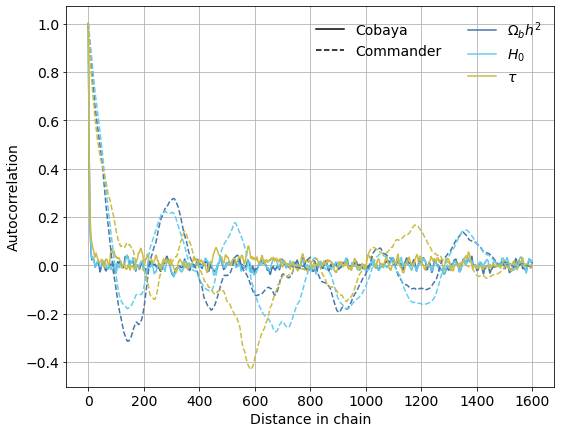

In [11]:
import emcee as mc
corr_cob_ombh2  = mc.autocorr.function_1d(samples_gal_binW["ombh2"])
corr_cob_H0     = mc.autocorr.function_1d(samples_gal_binW["H0"])
corr_cob_tau    = mc.autocorr.function_1d(samples_gal_binW["tau"])
corr_comm_ombh2 = mc.autocorr.function_1d(commander_chain_mask[:, 0])
corr_comm_H0    = mc.autocorr.function_1d(commander_chain_mask[:, 2])
corr_comm_tau   = mc.autocorr.function_1d(commander_chain_mask[:, 3])

colors = [colorblind[0], colorblind[1], colorblind[3]]
plt.rc('font', size = 14)

fig, ax = plt.subplots(figsize = (7*1.25, 7))
custom_cycler = cycler("color", colors)
ax.set_prop_cycle(custom_cycler)
ax.plot(corr_cob_ombh2[:1600])
ax.plot(corr_cob_H0[:1600])
ax.plot(corr_cob_tau[:1600])
ax.plot(corr_comm_ombh2[:1600], ls = '--')
ax.plot(corr_comm_H0[:1600], ls = '--')
ax.plot(corr_comm_tau[:1600], ls = '--')
ax.grid()
ax.set_xlabel("Distance in chain")
ax.set_ylabel("Autocorrelation")

lines = ax.get_lines()
dummy_lines = []
dummy_lines.append(ax.plot([],[], c="black")[0])
dummy_lines.append(ax.plot([],[], c="black", ls = '--')[0])
    
legend1 = plt.legend([lines[i] for i in [0, 1, 2]], [r"$\Omega_bh^2$", r"$H_0$", r"$\tau$"], loc = 'best')
legend2 = plt.legend([dummy_lines[i] for i in [0, 1]], ["Cobaya", "Commander"], loc = (0.5, 0.85))
ax.add_artist(legend1)

plt.savefig('../../thesis_figures/autocorr_gal.pdf')
plt.show()

In [16]:
chain = pd.read_csv("chains/As_ns_pol.1.txt", header = 0, delim_whitespace = True)
chain

,weight,minuslogpost,As,ns,A,minuslogprior,minuslogprior__0,chi2,chi2__all_like
0,2,3816241.6,2.085215e-09,0.969328,2.085215,-19.529343,-19.529343,7632522.3,7632522.3
1,7,3816238.2,2.085681e-09,0.962001,2.085681,-19.529343,-19.529343,7632515.5,7632515.5
2,5,3816238.3,2.090365e-09,0.967193,2.090365,-19.529343,-19.529343,7632515.7,7632515.7
3,9,3816237.6,2.106335e-09,0.967666,2.106335,-19.529343,-19.529343,7632514.2,7632514.2
4,4,3816236.9,2.099602e-09,0.967406,2.099602,-19.529343,-19.529343,7632512.9,7632512.9
...,...,...,...,...,...,...,...,...,...
2155,2,3816239.0,2.083337e-09,0.953603,2.083337,-19.529343,-19.529343,7632517.1,7632517.1
2156,1,3816238.2,2.090909e-09,0.954434,2.090909,-19.529343,-19.529343,7632515.4,7632515.4
2157,5,3816238.4,2.092598e-09,0.954152,2.092598,-19.529343,-19.529343,7632515.9,7632515.9
2158,3,3816237.2,2.099584e-09,0.968700,2.099584,-19.529343,-19.529343,7632513.5,7632513.5


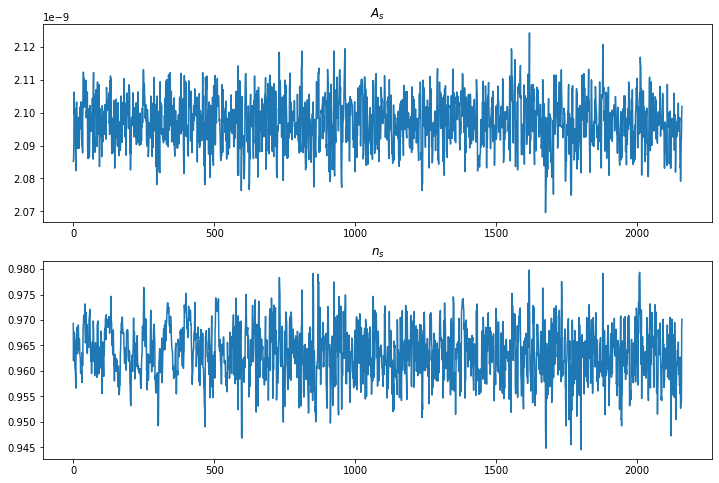

In [3]:
fig, ax = plt.subplots(2, 1, figsize = (12, 8))
ax[0].plot(chain["As"])
ax[0].set_title(r"$A_s$")
ax[1].plot(chain["ns"])
ax[1].set_title(r"$n_s$")
plt.show()

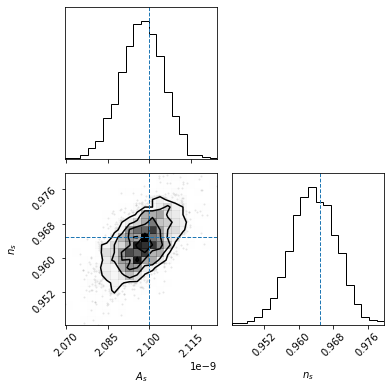

In [4]:
samples = chain.iloc[:, 2:4]
fig = corner.corner(samples, labels = [r"$A_s$", r"$n_s$"])
corner.overplot_lines(fig, [2.1e-9, 0.9649], ls = '--', lw = 1)
plt.tight_layout()
plt.show()

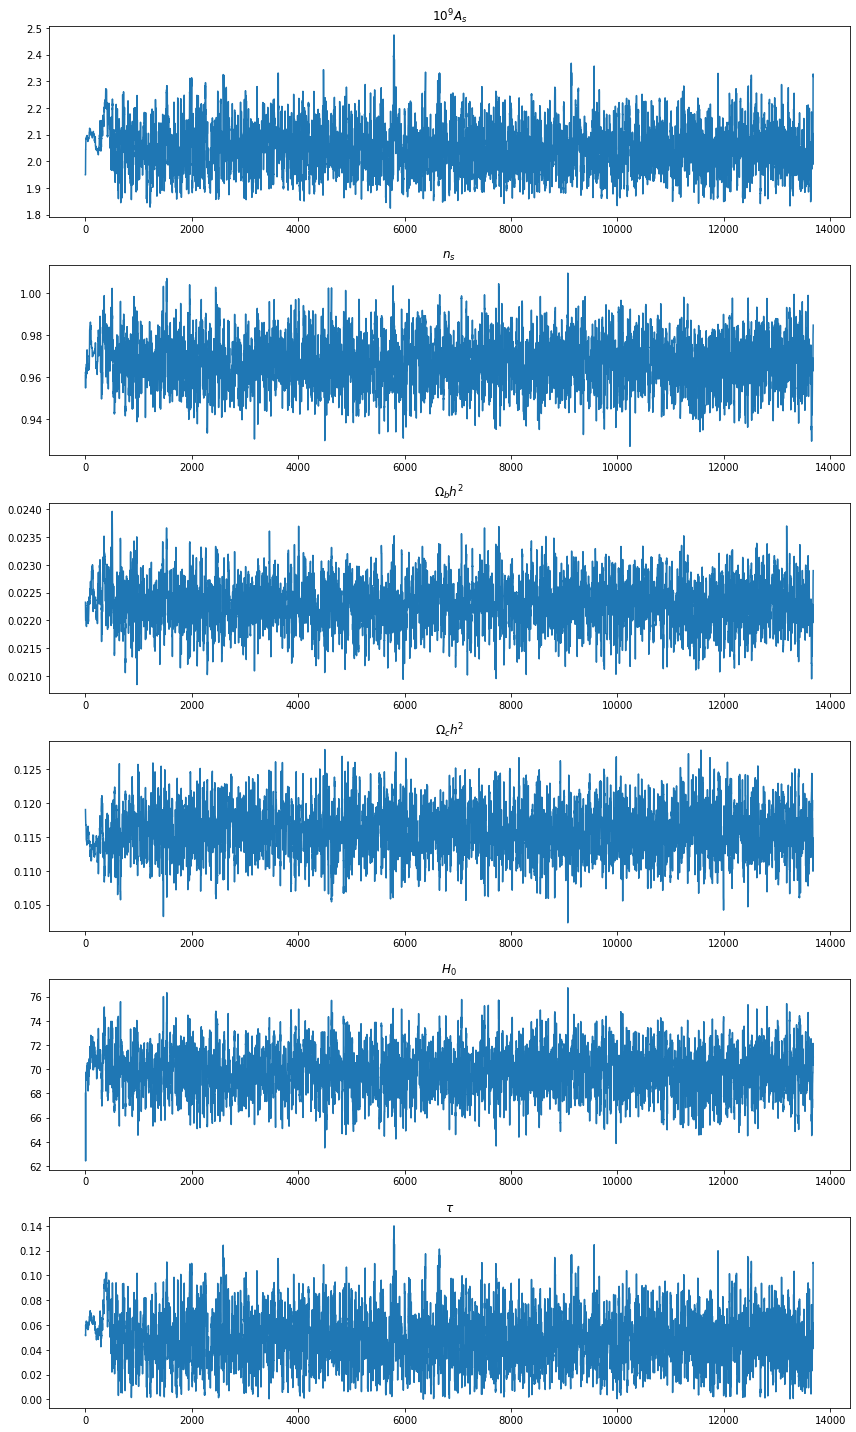

In [5]:
chain_pol_all = pd.read_csv("chains/all_pol.1.txt", header = 0, delim_whitespace = True)
fig, ax = plt.subplots(6, 1, figsize = (12, 20))
ax[0].plot(chain_pol_all["A"])
ax[0].set_title(r"$10^9 A_s$")

ax[1].plot(chain_pol_all["ns"])
ax[1].set_title(r"$n_s$")

ax[2].plot(chain_pol_all["ombh2"])
ax[2].set_title(r"$\Omega_b h^2$")

ax[3].plot(chain_pol_all["omch2"])
ax[3].set_title(r"$\Omega_c h^2$")

ax[4].plot(chain_pol_all["H0"])
ax[4].set_title(r"$H_0$")

ax[5].plot(chain_pol_all["tau"])
ax[5].set_title(r"$\tau$")
plt.tight_layout()
plt.show()

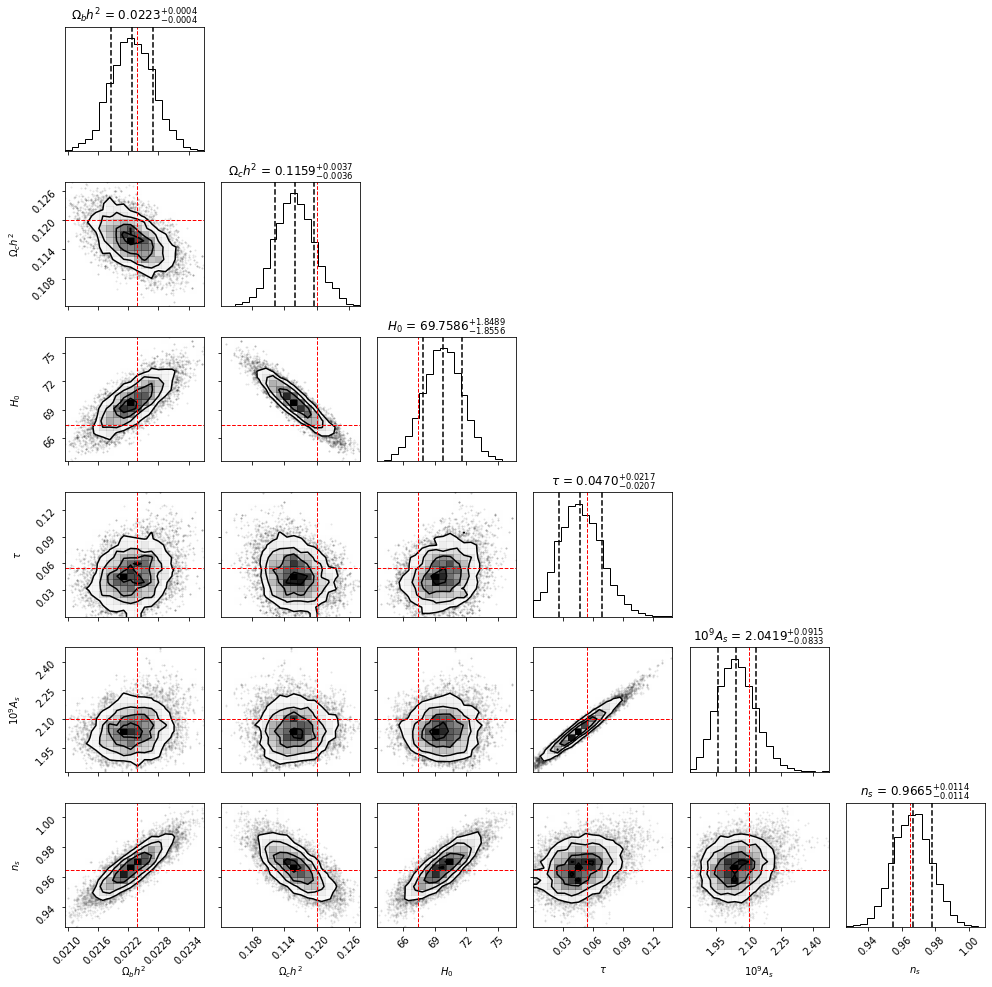

In [6]:
samples_pol_all = chain_pol_all[cols]
fig = corner.corner(samples_pol_all.iloc[1000:], labels = [r"$\Omega_b h^2$", r"$\Omega_c h^2$", r"$H_0$", r"$\tau$", r"$10^9 A_s$", r"$n_s$"], 
                    quantiles = [0.16, 0.50, 0.84], show_titles = True, title_fmt = '.4f')
corner.overplot_lines(fig, [0.02237, 0.12, 67.36, 0.0544, 2.1, 0.9649], ls = '--', lw = 1, color = 'r')
plt.tight_layout()
plt.show()

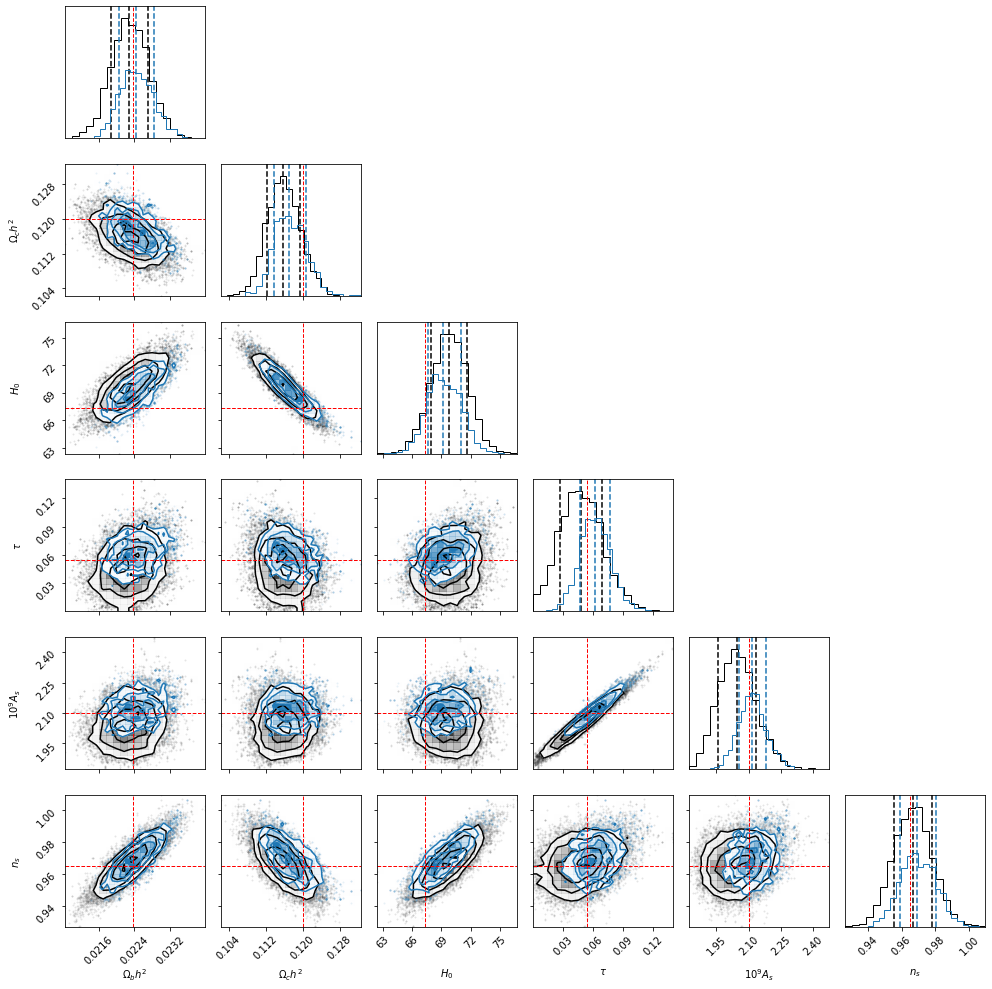

In [7]:
chain_johanres = pd.read_csv('chains/johannes_sim.dat', sep="\s+", names = ["ombh2", "omch2", "H0", "tau", "A", "ns"])

fig = corner.corner(samples_pol_all, labels = [r"$\Omega_b h^2$", r"$\Omega_c h^2$", r"$H_0$", r"$\tau$", r"$10^9 A_s$", r"$n_s$"], 
                    quantiles = [0.16, 0.50, 0.84], color = 'k', lw = 1)
corner.corner(chain_johanres, labels = [r"$\Omega_b h^2$", r"$\Omega_c h^2$", r"$H_0$", r"$\tau$", r"$10^9 A_s$", r"$n_s$"], 
              quantiles = [0.16, 0.50, 0.84], color = 'tab:blue', lw = 1, fig = fig) #, show_titles = True, title_fmt = '.4f')
corner.overplot_lines(fig, [0.02237, 0.12, 67.36, 0.0544, 2.1, 0.9649], ls = '--', lw = 1, color = 'r')
plt.tight_layout()
plt.show()

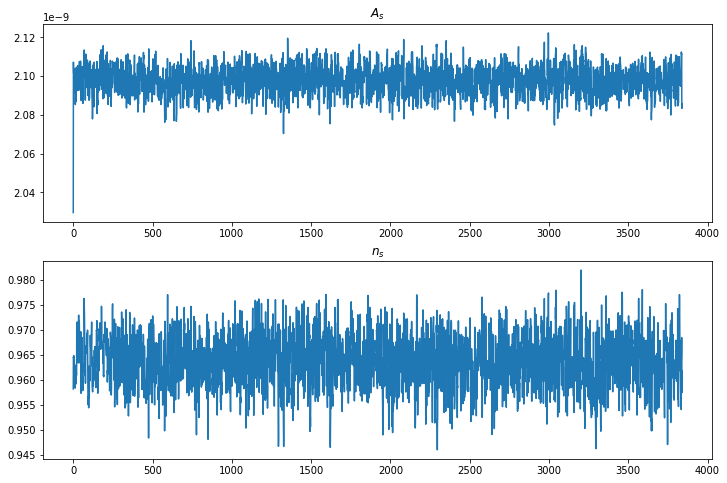

In [9]:
chain_temp = pd.read_csv("chains/As_ns_est.1.txt", header = 0, delim_whitespace = True)
fig, ax = plt.subplots(2, 1, figsize = (12, 8))
ax[0].plot(chain_temp["As"])
ax[0].set_title(r"$A_s$")
ax[1].plot(chain_temp["ns"])
ax[1].set_title(r"$n_s$")
plt.show()

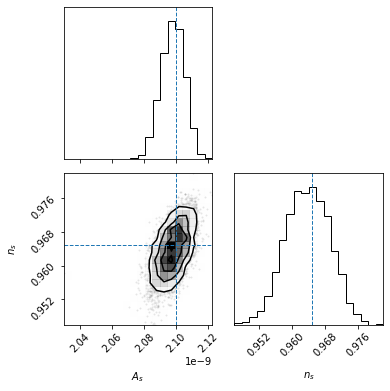

In [10]:
samples_temp = chain_temp.iloc[:, 2:4]
fig = corner.corner(samples_temp, labels = [r"$A_s$", r"$n_s$"])
corner.overplot_lines(fig, [2.1e-9, 0.9649], ls = '--', lw = 1)
plt.tight_layout()
plt.show()

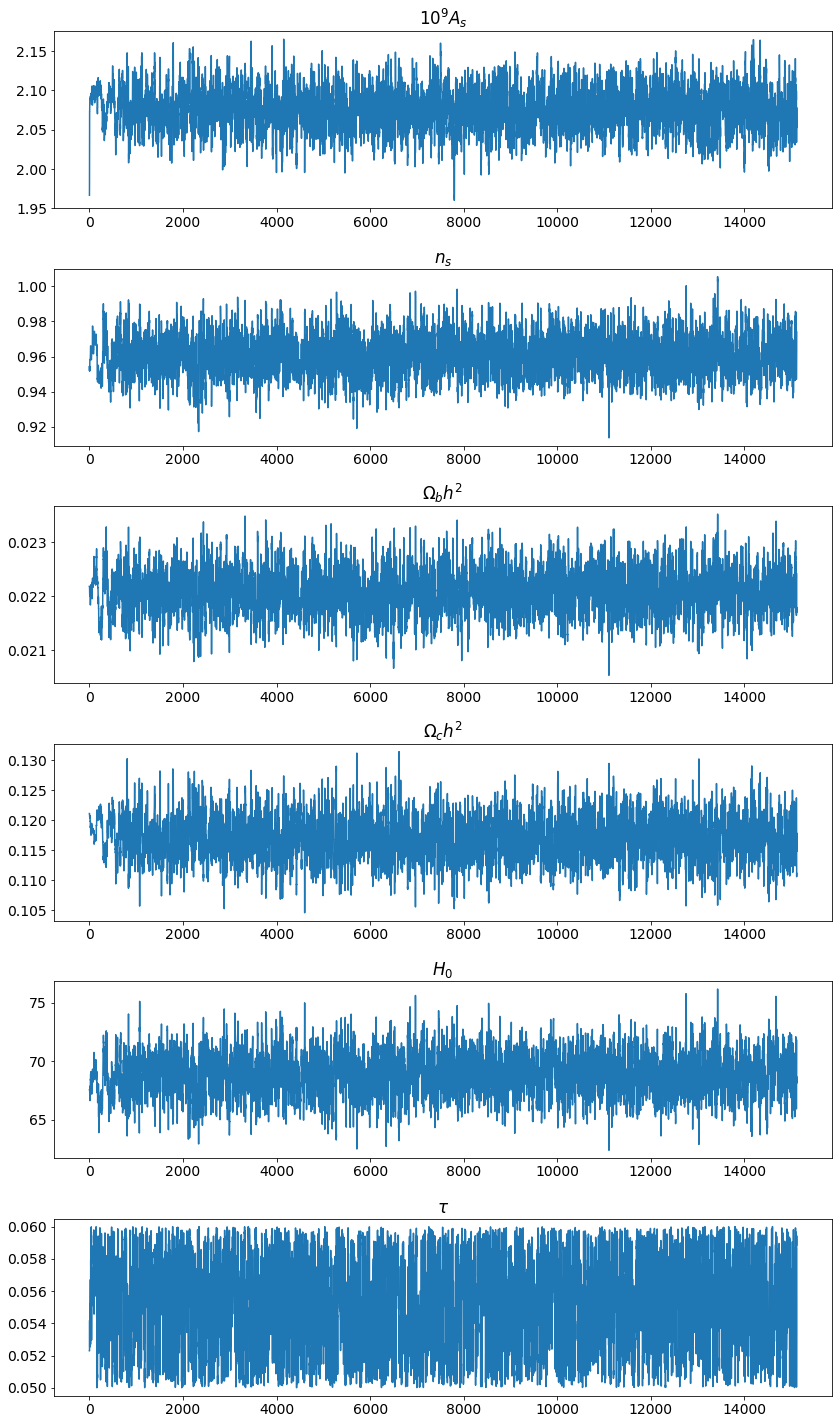

In [25]:
chain_temp_all = pd.read_csv("chains/all_est.1.txt", header = 0, delim_whitespace = True)
fig, ax = plt.subplots(6, 1, figsize = (12, 20))
ax[0].plot(chain_temp_all["A"])
ax[0].set_title(r"$10^9 A_s$")

ax[1].plot(chain_temp_all["ns"])
ax[1].set_title(r"$n_s$")

ax[2].plot(chain_temp_all["ombh2"])
ax[2].set_title(r"$\Omega_b h^2$")

ax[3].plot(chain_temp_all["omch2"])
ax[3].set_title(r"$\Omega_c h^2$")

ax[4].plot(chain_temp_all["H0"])
ax[4].set_title(r"$H_0$")

ax[5].plot(chain_temp_all["tau"])
ax[5].set_title(r"$\tau$")
plt.tight_layout()
plt.show()

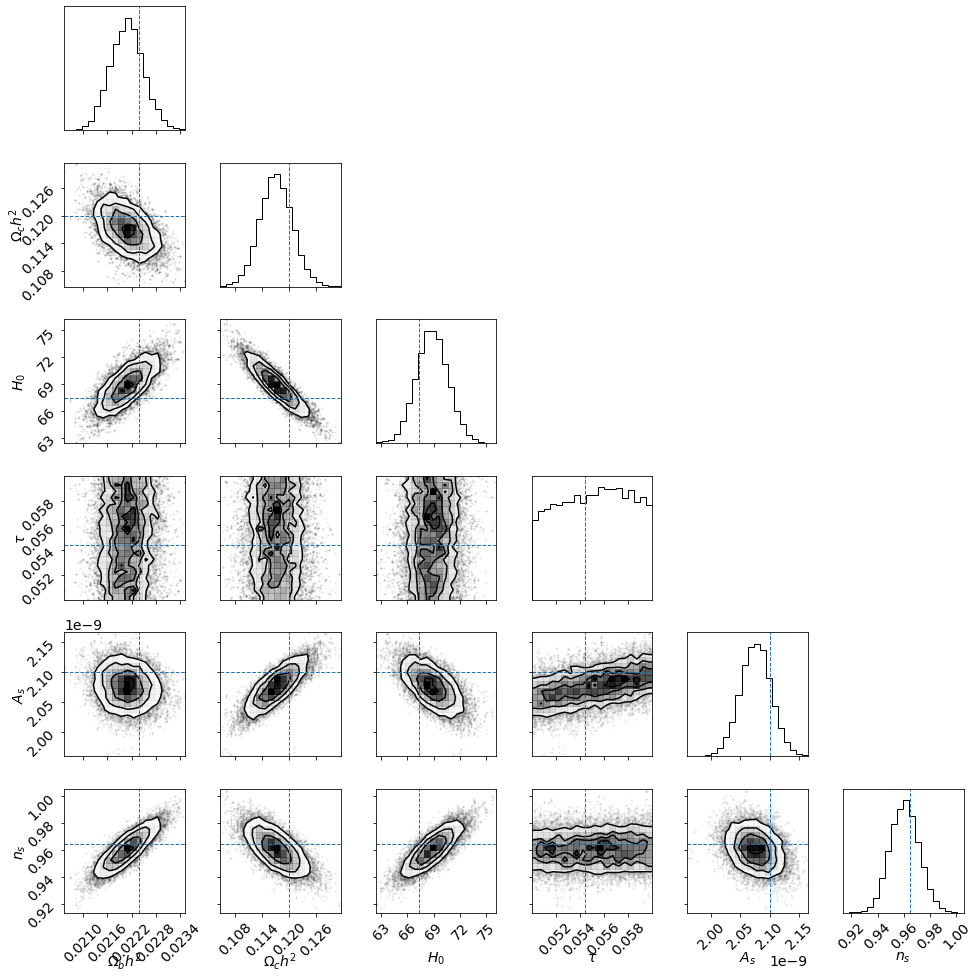

In [26]:
samples_temp_all = chain_temp_all.iloc[:, 2:8]
fig = corner.corner(samples_temp_all, labels = [r"$\Omega_b h^2$", r"$\Omega_c h^2$", r"$H_0$", r"$\tau$", r"$A_s$", r"$n_s$"])
corner.overplot_lines(fig, [0.02237, 0.12, 67.36, 0.0544, 2.1e-9, 0.9649], ls = '--', lw = 1)
plt.tight_layout()
plt.show()

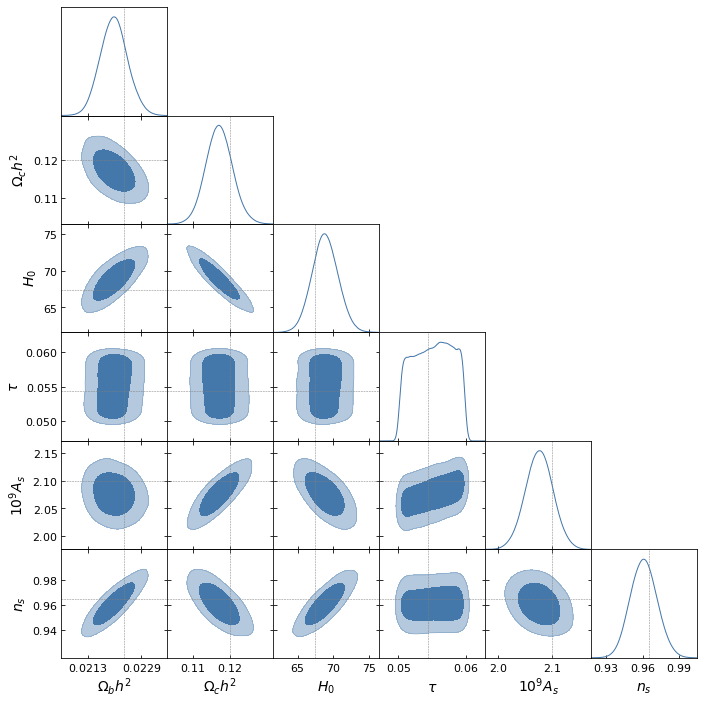

In [27]:
samples_temp_all = chain_temp_all[cols]
cobaya_chain_temp = np.array(samples_temp_all.iloc[10:])

samples_cobaya = MCSamples(samples=cobaya_chain_temp, names = cols, labels = labels, label = "Cobaya")
g = plots.get_subplot_plotter(width_inch=10)
g.settings.figure_legend_frame = False
g.settings.scaling = False
g.triangle_plot(samples_cobaya, filled = True, contour_colors = colorblind, 
                line_args = [{'color': colorblind[0]}],
                markers = {
                    cols[0]: correct_values[0],
                    cols[1]: correct_values[1],
                    cols[2]: correct_values[2], 
                    cols[3]: correct_values[3], 
                    cols[4]: correct_values[4],
                    cols[5]: correct_values[5]})
plt.savefig('../../thesis_figures/corner_overconstrained.pdf')